# 🔍 Exploratory Data Analysis (EDA)
## Bosch Production Line Quality Prediction

### Problem Tanımı
Bosch üretim hattından geçen parçaların kalite kontrolünden geçip geçmeyeceğini tahmin etmek.
- **Hedef Değişken:** `Response` (0 = Sağlam, 1 = Hatalı)
- **Problem Tipi:** Binary Classification (İkili Sınıflandırma)
- **Zorluklar:** 
  - Çok büyük veri seti (~1M satır, ~1000+ özellik)
  - Aşırı dengesiz sınıflar (~%0.5 hatalı)
  - Yüksek oranda eksik veri (sparse data)

### Veri Seti Yapısı
- `train_numeric.csv` - Sayısal özellikler + Response
- `train_categorical.csv` - Kategorik özellikler  
- `train_date.csv` - Zaman damgaları
- Feature isimlendirme: `L{line}_S{station}_F{feature}` (örn: L3_S36_F3939)

In [1]:
# Kütüphaneleri Yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ayarlar
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Kütüphaneler yüklendi!")

✅ Kütüphaneler yüklendi!


## 1. Veri Yükleme

⚠️ **Önemli:** Bosch veri seti çok büyük olduğu için tamamını yüklemek yerine:
- İlk 100.000 satırı örnekleyeceğiz (MVP için yeterli)
- Sadece `train_numeric.csv` ile başlayacağız

In [2]:
# Veriyi Yükleme (İlk 100.000 satır)
# Not: Tam veri seti ~1.2M satır, bellek tasarrufu için örnekleme yapıyoruz

DATA_PATH = '../data/train_numeric.csv'
SAMPLE_SIZE = 100_000  # Bilgisayar yavaşsa 50_000 yapabilirsiniz

print(f"📂 Veri yükleniyor: {DATA_PATH}")
print(f"📊 Örneklem boyutu: {SAMPLE_SIZE:,} satır")

df = pd.read_csv(DATA_PATH, nrows=SAMPLE_SIZE)

print(f"\n✅ Veri yüklendi!")
print(f"📐 Boyut: {df.shape[0]:,} satır x {df.shape[1]:,} sütun")
print(f"💾 Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

📂 Veri yükleniyor: ../data/train_numeric.csv
📊 Örneklem boyutu: 100,000 satır

✅ Veri yüklendi!
📐 Boyut: 100,000 satır x 970 sütun
💾 Bellek kullanımı: 740.1 MB

✅ Veri yüklendi!
📐 Boyut: 100,000 satır x 970 sütun
💾 Bellek kullanımı: 740.1 MB


In [3]:
# İlk bakış
print("📋 İlk 5 satır:")
df.head()

📋 İlk 5 satır:


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,...,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## 2. Hedef Değişken Analizi (Response)

Bu veri setinin en büyük zorluğu **sınıf dengesizliği**dir. Hatalı parçalar çok nadir görülür.

📊 Response Dağılımı:
   0 (Sağlam): 99,432 (99.43%)
   1 (Hatalı): 568 (0.57%)

⚠️ Dengesizlik Oranı: 1:175


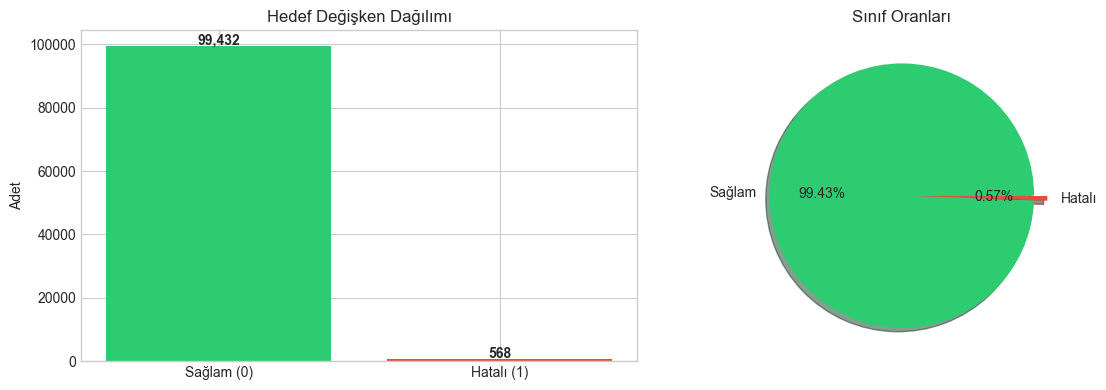


💡 Yorum: Bu kadar dengesiz bir veri setinde 'Accuracy' yanıltıcı olacaktır.
   Model değerlendirmede F1-Score, Precision, Recall ve AUC-ROC kullanacağız.


In [4]:
# Hedef değişken dağılımı
target_counts = df['Response'].value_counts()
failure_rate = df['Response'].mean() * 100

print("📊 Response Dağılımı:")
print(f"   0 (Sağlam): {target_counts[0]:,} ({100-failure_rate:.2f}%)")
print(f"   1 (Hatalı): {target_counts[1]:,} ({failure_rate:.2f}%)")
print(f"\n⚠️ Dengesizlik Oranı: 1:{int(target_counts[0]/target_counts[1])}")

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Sağlam (0)', 'Hatalı (1)'], target_counts.values, color=colors)
axes[0].set_ylabel('Adet')
axes[0].set_title('Hedef Değişken Dağılımı')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['Sağlam', 'Hatalı'], colors=colors,
            autopct='%1.2f%%', explode=(0, 0.1), shadow=True)
axes[1].set_title('Sınıf Oranları')

plt.tight_layout()
plt.savefig('../docs/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Yorum: Bu kadar dengesiz bir veri setinde 'Accuracy' yanıltıcı olacaktır.")
print("   Model değerlendirmede F1-Score, Precision, Recall ve AUC-ROC kullanacağız.")

## 3. Eksik Veri Analizi (Missing Values)

Bosch veri seti çok **seyrek (sparse)**. Bir parça üretim hattındaki tüm istasyonlardan geçmez, bu yüzden çoğu özellik NaN içerir.

📊 Eksik Veri İstatistikleri:
   Toplam hücre: 97,000,000
   Eksik hücre: 78,541,548
   Eksik oran: %80.97

📈 Sütun Bazında Eksik Veri:
   En az eksik: %0.00
   En çok eksik: %99.92
   Ortalama eksik: %80.97
   Tamamen dolu sütun sayısı: 2


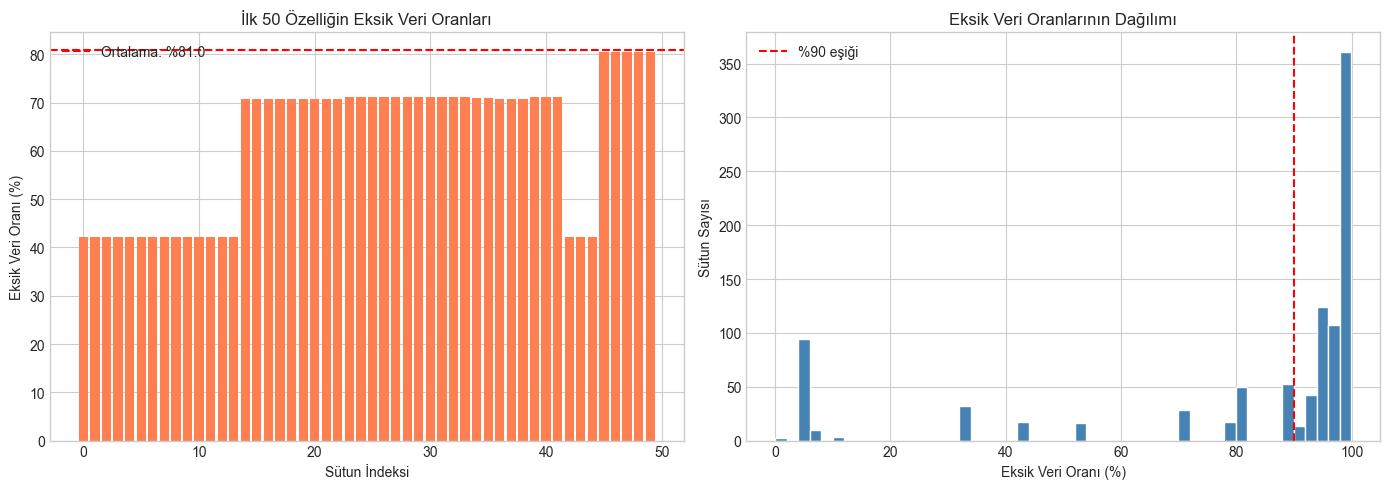


⚠️ %90'dan fazla eksik veriye sahip sütun sayısı: 634
   Bu sütunları model eğitiminde çıkaracağız.


In [5]:
# Eksik veri analizi
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
missing_ratio = missing_cells / total_cells * 100

print("📊 Eksik Veri İstatistikleri:")
print(f"   Toplam hücre: {total_cells:,}")
print(f"   Eksik hücre: {missing_cells:,}")
print(f"   Eksik oran: %{missing_ratio:.2f}")

# Sütun bazında eksik veri
missing_per_col = df.isnull().mean() * 100
print(f"\n📈 Sütun Bazında Eksik Veri:")
print(f"   En az eksik: %{missing_per_col.min():.2f}")
print(f"   En çok eksik: %{missing_per_col.max():.2f}")
print(f"   Ortalama eksik: %{missing_per_col.mean():.2f}")

# Tamamen dolu sütunlar
full_cols = (missing_per_col == 0).sum()
print(f"   Tamamen dolu sütun sayısı: {full_cols}")

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# İlk 50 sütunun eksik veri oranları
axes[0].bar(range(50), missing_per_col.iloc[1:51].values, color='coral')
axes[0].set_xlabel('Sütun İndeksi')
axes[0].set_ylabel('Eksik Veri Oranı (%)')
axes[0].set_title('İlk 50 Özelliğin Eksik Veri Oranları')
axes[0].axhline(y=missing_per_col.mean(), color='red', linestyle='--', label=f'Ortalama: %{missing_per_col.mean():.1f}')
axes[0].legend()

# Eksik veri dağılımı histogram
axes[1].hist(missing_per_col.values, bins=50, color='steelblue', edgecolor='white')
axes[1].set_xlabel('Eksik Veri Oranı (%)')
axes[1].set_ylabel('Sütun Sayısı')
axes[1].set_title('Eksik Veri Oranlarının Dağılımı')
axes[1].axvline(x=90, color='red', linestyle='--', label='%90 eşiği')
axes[1].legend()

plt.tight_layout()
plt.savefig('../docs/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

# %90'dan fazla eksik olan sütunlar
high_missing = (missing_per_col > 90).sum()
print(f"\n⚠️ %90'dan fazla eksik veriye sahip sütun sayısı: {high_missing}")
print("   Bu sütunları model eğitiminde çıkaracağız.")

## 4. Üretim Hattı Analizi

Feature isimleri `L{line}_S{station}_F{feature}` formatında. Hangi hatlarda/istasyonlarda sorun çıkıyor?

🏭 Üretim Hattı Bilgileri:
   Toplam özellik sayısı: 968
   Benzersiz hat sayısı: 4 → [0, 1, 2, 3]
   Benzersiz istasyon sayısı: 50


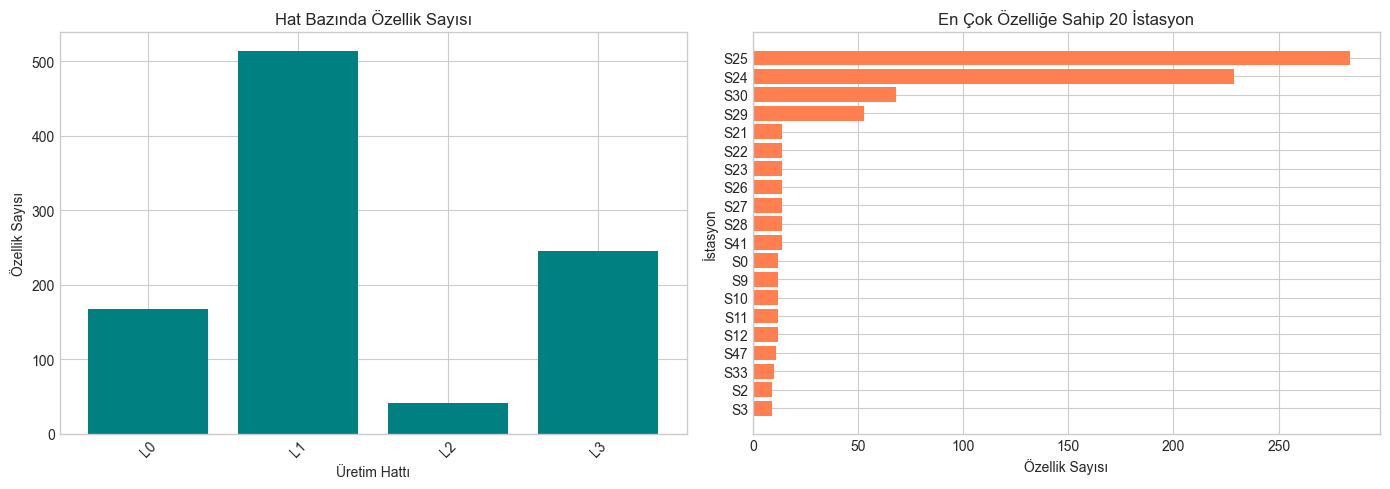

In [6]:
# Feature isimlerinden hat ve istasyon bilgilerini çıkar
import re

feature_cols = [c for c in df.columns if c not in ['Id', 'Response']]

# Hat ve istasyon bilgilerini ayıkla
lines = []
stations = []
for col in feature_cols:
    match = re.match(r'L(\d+)_S(\d+)_F\d+', col)
    if match:
        lines.append(int(match.group(1)))
        stations.append(int(match.group(2)))

unique_lines = sorted(set(lines))
unique_stations = sorted(set(stations))

print(f"🏭 Üretim Hattı Bilgileri:")
print(f"   Toplam özellik sayısı: {len(feature_cols)}")
print(f"   Benzersiz hat sayısı: {len(unique_lines)} → {unique_lines}")
print(f"   Benzersiz istasyon sayısı: {len(unique_stations)}")

# Hat bazında özellik sayısı
from collections import Counter
line_counts = Counter(lines)
station_counts = Counter(stations)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hat bazında özellik sayısı
axes[0].bar([f'L{l}' for l in sorted(line_counts.keys())], 
            [line_counts[l] for l in sorted(line_counts.keys())],
            color='teal')
axes[0].set_xlabel('Üretim Hattı')
axes[0].set_ylabel('Özellik Sayısı')
axes[0].set_title('Hat Bazında Özellik Sayısı')
axes[0].tick_params(axis='x', rotation=45)

# En çok özelliğe sahip istasyonlar (Top 20)
top_stations = sorted(station_counts.items(), key=lambda x: x[1], reverse=True)[:20]
axes[1].barh([f'S{s[0]}' for s in top_stations], [s[1] for s in top_stations], color='coral')
axes[1].set_xlabel('Özellik Sayısı')
axes[1].set_ylabel('İstasyon')
axes[1].set_title('En Çok Özelliğe Sahip 20 İstasyon')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../docs/production_lines.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. EDA Özeti ve Bulgular

### 📋 Temel Bulgular:
1. **Veri Boyutu:** ~1000+ özellik, çok büyük veri seti
2. **Sınıf Dengesizliği:** Hatalı parçalar çok nadir (~%0.5)
3. **Eksik Veri:** Çok yüksek oranda eksik veri (sparse data)
4. **Feature Yapısı:** Özellikler üretim hattı ve istasyona göre gruplanmış

### 🎯 Model Stratejisi:
- **Metrik:** F1-Score ve AUC-ROC (Accuracy değil!)
- **Dengesizlik:** SMOTE veya class_weight kullanılacak
- **Eksik Veri:** %90+ eksik sütunlar çıkarılacak, geri kalanlar -999 ile doldurulacak
- **Örnekleme:** İlk aşamada 100K satır ile çalışılacak

In [ ]:
# EDA özeti - kaydet
eda_summary = {
    'total_rows': df.shape[0],
    'total_columns': df.shape[1],
    'feature_columns': len(feature_cols),
    'target_0_count': int(target_counts[0]),
    'target_1_count': int(target_counts[1]),
    'failure_rate': round(failure_rate, 4),
    'missing_ratio': round(missing_ratio, 2),
    'unique_lines': unique_lines,
    'unique_stations': len(unique_stations)
}

print("📊 EDA Özeti:")
for key, value in eda_summary.items():
    print(f"   {key}: {value}")

# Sonraki notebook için kullanılacak
print("\n✅ EDA tamamlandı! Bir sonraki adım: 02_baseline.ipynb")

📊 EDA Özeti:
   total_rows: 100000
   total_columns: 970
   feature_columns: 968
   target_0_count: 99432
   target_1_count: 568
   failure_rate: 0.568
   missing_ratio: 80.97
   unique_lines: [0, 1, 2, 3]
   unique_stations: 50

✅ EDA tamamlandı! Bir sonraki adım: 02_baseline.ipynb
